<a href="https://colab.research.google.com/github/charann90/House-price-prediction/blob/main/part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#data uploading
df=pd.read_excel('/content/DS - Assignment Part 1 data set.xlsx')

In [4]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [5]:
#dropping date column as we have house age 
df.drop(['Transaction date'],axis=1,inplace=True)

In [6]:
df.info

<bound method DataFrame.info of      House Age  Distance from nearest Metro station (km)  \
0         32.0                                  84.87882   
1         19.5                                 306.59470   
2         13.3                                 561.98450   
3         13.3                                 561.98450   
4          5.0                                 390.56840   
..         ...                                       ...   
409       13.7                                4082.01500   
410        5.6                                  90.45606   
411       18.8                                 390.96960   
412        8.1                                 104.81010   
413        6.5                                  90.45606   

     Number of convenience stores  latitude  longitude  Number of bedrooms  \
0                              10  24.98298  121.54024                   1   
1                               9  24.98034  121.53951                   2   
2            

In [7]:
df.describe()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [8]:
df.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [9]:
df['Number of convenience stores'].value_counts()

5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Number of convenience stores, dtype: int64

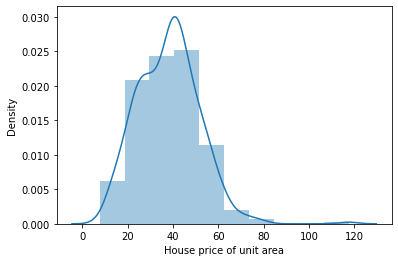

In [10]:
sns.distplot(df['House price of unit area'],bins=10)

price range is normally distributed

In [11]:
#creating dummy variables
df=pd.get_dummies(df,columns=['Number of convenience stores','Number of bedrooms'])

In [12]:
df

,House Age,Distance from nearest Metro station (km),latitude,longitude,House size (sqft),House price of unit area,Number of convenience stores_0,Number of convenience stores_1,Number of convenience stores_2,Number of convenience stores_3,Number of convenience stores_4,Number of convenience stores_5,Number of convenience stores_6,Number of convenience stores_7,Number of convenience stores_8,Number of convenience stores_9,Number of convenience stores_10,Number of bedrooms_1,Number of bedrooms_2,Number of bedrooms_3
0,32.0,84.87882,24.98298,121.54024,575,37.9,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,19.5,306.59470,24.98034,121.53951,1240,42.2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,13.3,561.98450,24.98746,121.54391,1060,47.3,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,13.3,561.98450,24.98746,121.54391,875,54.8,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5.0,390.56840,24.97937,121.54245,491,43.1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,24.94155,121.50381,803,15.4,1,0,0,0,0,0,0,0,0,0,0,0,0,1
410,5.6,90.45606,24.97433,121.54310,1278,50.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
411,18.8,390.96960,24.97923,121.53986,503,40.6,0,0,0,0,0,0,0,1,0,0,0,1,0,0
412,8.1,104.81010,24.96674,121.54067,597,52.5,0,0,0,0,0,1,0,0,0,0,0,1,0,0


# Machine Learning

In [13]:
#splitting the data into x and y variables 
y=df['House price of unit area']
x=df.drop(['House price of unit area'],axis=1)

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2,random_state=42)



In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
regressor.intercept_

6002.727493377321

In [18]:
regressor.coef_

array([-2.70871206e-01, -4.93344204e-03,  2.91363334e+02, -1.08873256e+02,
        2.80280809e-03, -2.83682631e+00, -1.05425651e+00, -6.96488332e+00,
       -6.66973634e+00, -5.00141829e+00,  1.13105115e+00,  4.54379331e+00,
        1.80851758e+00,  4.31932098e+00,  7.04410368e+00,  3.68033408e+00,
        7.67979746e-01, -9.03607079e-01,  1.35627333e-01])

In [19]:
y_pred_test= regressor.predict(x_test)

In [20]:
y_pred_train= regressor.predict(x_train)

In [21]:
df_pred=pd.DataFrame({'actual':y_test.squeeze(),'predicted':y_pred_test.squeeze()})

In [22]:
df_pred.head(10)

,actual,predicted
358,45.1,49.516455
350,42.3,41.923236
373,52.2,48.012678
399,37.3,44.606465
369,22.8,27.645050
72,36.3,43.838911
262,53.0,46.559134
140,51.4,46.186381
93,16.1,25.697395
70,59.0,54.082464


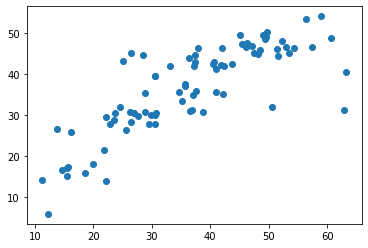

In [23]:
plt.scatter(y_test,y_pred_test)

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


In [25]:
r2_score(y_test,y_pred_test)

0.6522364560301819

In [26]:
mean_absolute_error(y_test,y_pred_test)

5.249151547007987

In [27]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

Ridge reguralization

In [28]:
model=Ridge(fit_intercept=True,alpha=0.01)

In [29]:
model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [30]:
train_preds=model.predict(x_train)

In [31]:
test_preds=model.predict(x_test)

In [32]:
print(r2_score(y_train, train_preds))

0.5835046048138504


# Decision tree regression

In [33]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [34]:
y_pred_test= tree_reg.predict(x_test)

In [35]:
y_pred_train= regressor.predict(x_test)

In [36]:
df_pred=pd.DataFrame({'actual':y_test.squeeze(),'predicted':y_pred_test.squeeze()})

In [37]:
df_pred

,actual,predicted
358,45.1,48.6
350,42.3,40.1
373,52.2,43.5
399,37.3,29.3
369,22.8,25.6
...,...,...
31,25.0,55.3
283,23.5,22.8
157,35.6,37.4
203,46.1,55.0


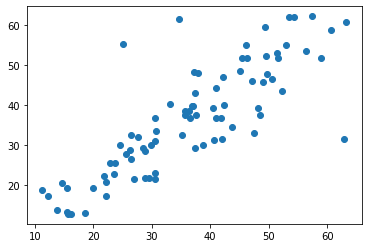

In [38]:
plt.scatter(y_test,y_pred_test)

In [39]:
r2_score(y_test,y_pred_test)

0.6305473802092466

In [40]:
mean_absolute_error(y_test,y_pred_test)

5.448192771084337

# Random Tree Regressor

In [41]:
reg= RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
y_pred_test = reg.predict(x_test)
y_pred_train = reg.predict(x_train)


In [43]:
df_pred=pd.DataFrame({'actual':y_test.squeeze(),'predicted':y_pred_test.squeeze()})

In [44]:
df_pred

,actual,predicted
358,45.1,50.170
350,42.3,39.197
373,52.2,61.140
399,37.3,33.941
369,22.8,26.959
...,...,...
31,25.0,44.944
283,23.5,32.888
157,35.6,37.534
203,46.1,53.930


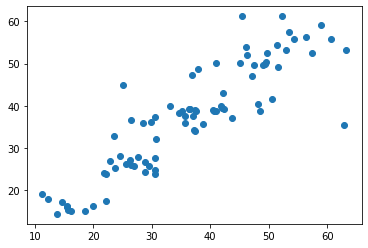

In [45]:
plt.scatter(y_test,y_pred_test)

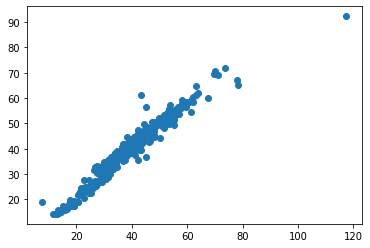

In [46]:
plt.scatter(y_train,y_pred_train)

In [47]:
r2_score(y_test,y_pred_test)

0.7704723807898487

In [48]:
r2_score(y_train,y_pred_train)

0.9491200445287098

Lasso Regression



In [49]:
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso=Lasso(random_state=42)
reg_1 = GridSearchCV(lasso, parameters, cv=3)
reg_1.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(random_state=42),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]})

In [50]:
from sklearn.metrics import mean_squared_error


In [51]:
y_pred_train = reg_1.predict(x_train)
r2_score(y_train, y_pred_train)

0.5863807621463497

In [52]:
y_pred_test = reg_1.predict(x_test)
r2_score(y_test, y_pred_test)

0.6522364560297953

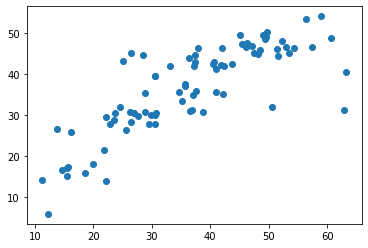

In [53]:
plt.scatter(y_test,y_pred_test)

Gradient Boosting Regressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [55]:
GBR.fit(x_train, y_train)


GradientBoostingRegressor(max_depth=4)

In [56]:
GBR.score(x_test, y_test)

0.7713018320168596

Importance of variables

In [57]:
#Deciding the importance of features of the dataframe
importance=reg.feature_importances_
importance

array([1.71385808e-01, 5.55317649e-01, 1.15371301e-01, 6.39520455e-02,
       3.63150807e-02, 2.45286332e-03, 1.05971162e-02, 2.95554750e-04,
       2.56904130e-03, 2.67070524e-03, 3.09979646e-03, 9.08343112e-03,
       2.67860376e-03, 1.52674198e-03, 6.34645343e-03, 3.32660639e-04,
       4.22443645e-03, 7.79670836e-03, 3.98400279e-03])

In [58]:
feature_names= list(x.columns)


In [59]:
#creating a dataframe for the features and its importance
tree_imp=pd.DataFrame(columns=['variable','importance'])
tree_imp.variable= feature_names
tree_imp.importance= importance
tree_imp

,variable,importance
0,House Age,0.171386
1,Distance from nearest Metro station (km),0.555318
2,latitude,0.115371
3,longitude,0.063952
4,House size (sqft),0.036315
5,Number of convenience stores_0,0.002453
6,Number of convenience stores_1,0.010597
7,Number of convenience stores_2,0.000296
8,Number of convenience stores_3,0.002569
9,Number of convenience stores_4,0.002671


In [60]:
#plotting the importance of the variables color bar graph
fig = px.bar(tree_imp, y = 'variable', 
       x = 'importance',
       labels = {'variable':'Varible Name','importance':'Affect on performance'},
       color = 'importance', 
       title = 'Variable vs Importance', 
       text = 'importance' ,
       color_continuous_scale=px.colors.qualitative.Plotly)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# conclusion



*   Random forest model is the ideal model for prediction with R2 score of train set- 94% and test set- 78%

*   Distance from nearest metro has highest importance which affect more for the performance followed by house age

